## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_table_df = pd.merge(mouse_metadata_df, study_results_df, on=['Mouse ID'])
# Display the data table for preview
combine_table_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [35]:
# Check the number of mice.

#Identify the number of mice in study
print(combine_table_df['Mouse ID'].nunique())
#Check number of rows in dataset
len(combine_table_df['Mouse ID'])

249


1893

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
dupe_rows = combine_table_df[combine_table_df.duplicated(['Mouse ID','Timepoint'])]

#Provide visuals for duplicated rows
dupe_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop any duplicate rows
main_df = combine_table_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [5]:
# Recheck the number of mice

#Note the number of mice in study
print(main_df['Mouse ID'].nunique())
#Note the number of rows in dataset
len(main_df['Mouse ID'])

249


1888

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
regimen_df = main_df.groupby(['Drug Regimen'])

#Variables to hold requested data
tumor_vol_mean = regimen_df['Tumor Volume (mm3)'].mean()
tumor_vol_median = regimen_df['Tumor Volume (mm3)'].median()
tumor_vol_variance = regimen_df.var()['Tumor Volume (mm3)']
tumor_vol_std_dev = regimen_df.std()['Tumor Volume (mm3)']
tumor_vol_sem = regimen_df.sem()['Tumor Volume (mm3)']

#New dataframe with inserted variables
summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_vol_mean,
                           "Median Tumor Volume": tumor_vol_median,
                           "Variance Tumor Volume": tumor_vol_variance,
                           "Tumor Volume Standard Deviation": tumor_vol_std_dev,
                           "Tumor Volume SEM": tumor_vol_sem})

#Display dataframe to ensure success
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Drug Usage')

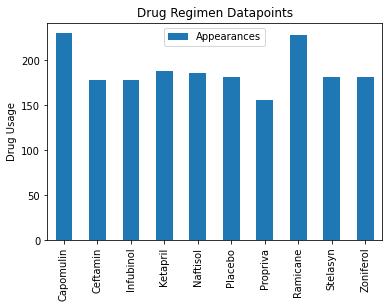

In [33]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

#Create variable for unique list of drugs
regimens = np.unique(main_df['Drug Regimen'])
#Store new datadrame grouped by the drug regimen
appearances_df = main_df.groupby(['Drug Regimen']).count()
#Create variable for drug usage in data
appearances = appearances_df['Mouse ID']

#Plot data to bar graph using pandas
plot_df = pd.DataFrame({'Appearances': appearances}, index=regimens)
barplt = plot_df.plot(kind='bar')
plt.title('Drug Regimen Datapoints')
plt.ylabel("Drug Usage")

Text(0, 0.5, 'Drug Usage')

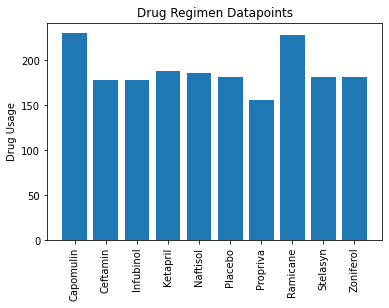

In [34]:
# Generate identical bar plot using pyplot instead of pandas.
regimens = np.unique(main_df['Drug Regimen'])
appearances_df = main_df.groupby(['Drug Regimen']).count()
appearances = appearances_df['Mouse ID']

plt.bar(regimens, appearances)
plt.xticks(rotation=90)
plt.title('Drug Regimen Datapoints')
plt.ylabel("Drug Usage")

Text(0.5, 1.0, 'Male Vs. Female Data Distribution')

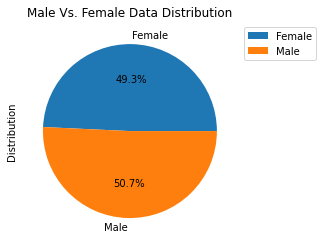

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_genders = np.unique(main_df['Sex'])
distribution_df = main_df.groupby(['Sex']).count()
distribution = distribution_df['Mouse ID']

plot_df2 = pd.DataFrame({'Distribution': distribution}, index=mouse_genders)
pieplt = plot_df2.plot.pie(y='Distribution', autopct="%1.1f%%")

pieplt.get_legend().set_bbox_to_anchor((1, 1))
plt.title('Male Vs. Female Data Distribution')

Text(0.5, 1.0, 'Male Vs. Female Data Distribution')

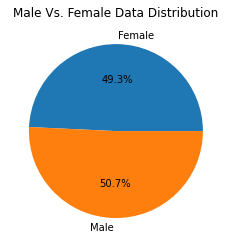

In [29]:
# Generate identical pie plot using pyplot
mouse_genders = np.unique(main_df['Sex'])
distribution_df = main_df.groupby(['Sex']).count()
distribution = distribution_df['Mouse ID']

plt.pie(distribution, labels=mouse_genders, autopct="%1.1f%%")
plt.title('Male Vs. Female Data Distribution')

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#cap_tot_vol = main_df[['Tumor Volume (mm3)']].sum(axis=1).where(main_df['Drug Regimen'] == 'Capomulin',1)
regimen_df = main_df.groupby(['Drug Regimen', 'Mouse ID'])

tumor_vol_sum = regimen_df['Tumor Volume (mm3)'].sum()
#print(tumor_vol_sum)

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = main_df.groupby(['Mouse ID'])['Timepoint'].max()
max_time = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = max_time.merge(main_df, on=['Mouse ID', 'Timepoint'], how="left")
merged_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [28]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
#print(final_tumor_vol)

<function matplotlib.pyplot.show(close=None, block=None)>

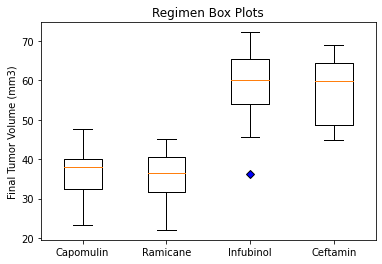

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
out_format = dict(markerfacecolor = 'blue', marker = 'D', markeredgecolor = 'black')
plt.boxplot(tumor_vol_data, labels = treatments, flierprops = out_format)
plt.title('Regimen Box Plots')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

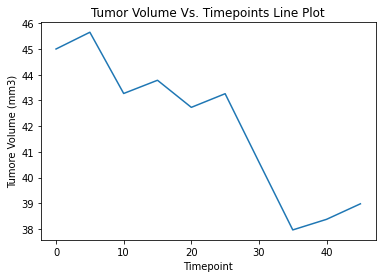

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
cap_data = main_df.loc[main_df['Drug Regimen'] == "Capomulin"]
single_mouse = cap_data.loc[cap_data['Mouse ID'] == "b128"]

plt.plot(single_mouse['Timepoint'], single_mouse['Tumor Volume (mm3)'])
plt.title("Tumor Volume Vs. Timepoints Line Plot")
plt.xlabel("Timepoint")
plt.ylabel("Tumore Volume (mm3)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

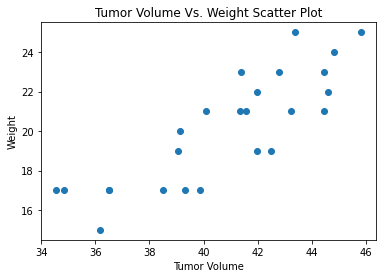

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
cap_mice = cap_data.groupby(['Mouse ID']).mean()

plt.scatter(cap_mice['Tumor Volume (mm3)'], cap_mice['Weight (g)'])
plt.title("Tumor Volume Vs. Weight Scatter Plot")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight")
plt.show

## Correlation and Regression

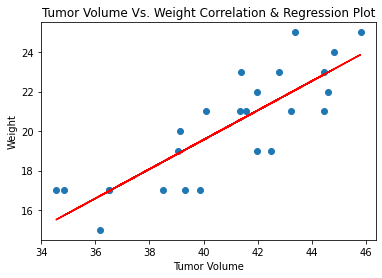

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mice['Tumor Volume (mm3)'], cap_mice['Weight (g)'])
round(correlation[0],2)

x_val = cap_mice['Tumor Volume (mm3)']
y_val = cap_mice['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=100,color="red")
plt.title("Tumor Volume Vs. Weight Correlation & Regression Plot")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight")
#plt.figure(figsize=(100, 100))
plt.show()

# Observations and Insights